                                          **Census Income Project**

**Problem Statement:**


**This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over Dollar 50K**

**Description of fnlwgt (final weight)**

***The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls.*** 

**These are:***

**A single cell estimate of the population 16+ for each state.**

**Controls for Hispanic Origin by age and sex.**

**Controls by Race, age and sex.**

**We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state**

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Income has to be taken as our Target variable which has two classes ' <=50K', ' >50K' so we can see this as a classification task**

**Post EDA encoding to be used in columns Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country**


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
#Checking shape of Dataset
df.shape

(32560, 15)

In [5]:
#Checking Duplicated in Dataset
df.duplicated().sum()

24

**Dropping Duplicates**

In [6]:
df.drop_duplicates(inplace=True)

**Checking shape of Dataset after dropping duplicates**

In [7]:
df.shape

(32536, 15)

In [8]:
print("Data loss after removing duplicate values is ",24/32560*100)

Data loss after removing duplicate values is  0.07371007371007371


**Miniscule data loss**

**Checking count of Null values in dataset**

In [9]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
#Checking Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


**No null values has been noted,we will seprate object data type and integer data type columns for better EDA**

**Object Data Type columns(Categorical)**

In [11]:
object_datatype =[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        object_datatype.append(i)
    
print("Object Data type columns are - ",object_datatype)    

Object Data type columns are -  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


**Integer data Type columns(Continuous)**

In [12]:
integer_datatype =[]
for i in df.dtypes.index:
    if df.dtypes[i]=='int64':
        integer_datatype.append(i)
    
print("Integer Data type columns are - ",integer_datatype)    

Integer Data type columns are -  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


**Checking Unique values in Dataset for object data type columns** 

In [13]:
for i in object_datatype:
    print(i)
    print(df[i].value_counts())
    print("-"*100)


Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
----------------------------------------------------------------------------------------------------
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
----------------------------------------------------------------------------------------------------
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4

**Class imbalance has been observed in our Target**

**'?' has been observed in Native_country,Occupation,Work_class we need to replace the same with some other name to understand the visualization in a better way**

In [14]:
#Replacing the ? with others
df['Occupation'].replace({' ?':' Others'},inplace=True)
df['Native_country'].replace({' ?':' Others'},inplace=True)
df['Workclass'].replace({' ?':' Others'},inplace=True)


**Dataset is ready for our Visualization**

In [15]:
print("Object dtype columns :",object_datatype)
print("Integer dtype columns:",integer_datatype)

Object dtype columns : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Integer dtype columns: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


# Visualization

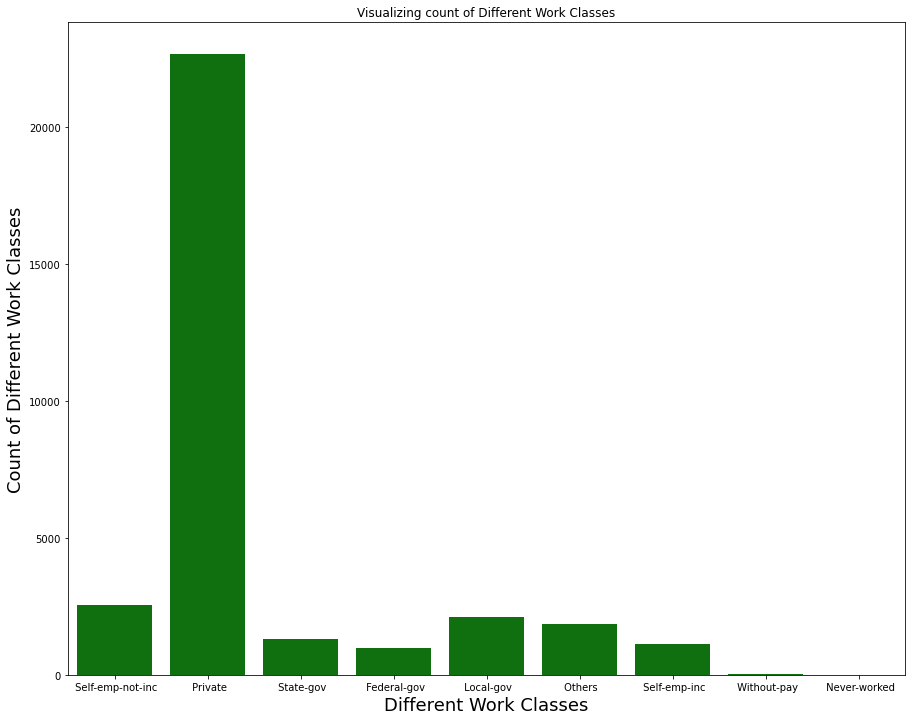

In [16]:
plt.figure(figsize=(15,12))
sns.countplot(x='Workclass',data=df,color='green')
plt.xlabel('Different Work Classes',fontsize=18)
plt.ylabel('Count of Different Work Classes',fontsize=18)
plt.title("Visualizing count of Different Work Classes")
plt.show()

                                        **Observations**

**Private employees count are having the most number of counts as compared to other sectors which has been observed**

**State-gov and Federal-gov are having same count of numbers, where Local-gov and others are relatively close to each other**

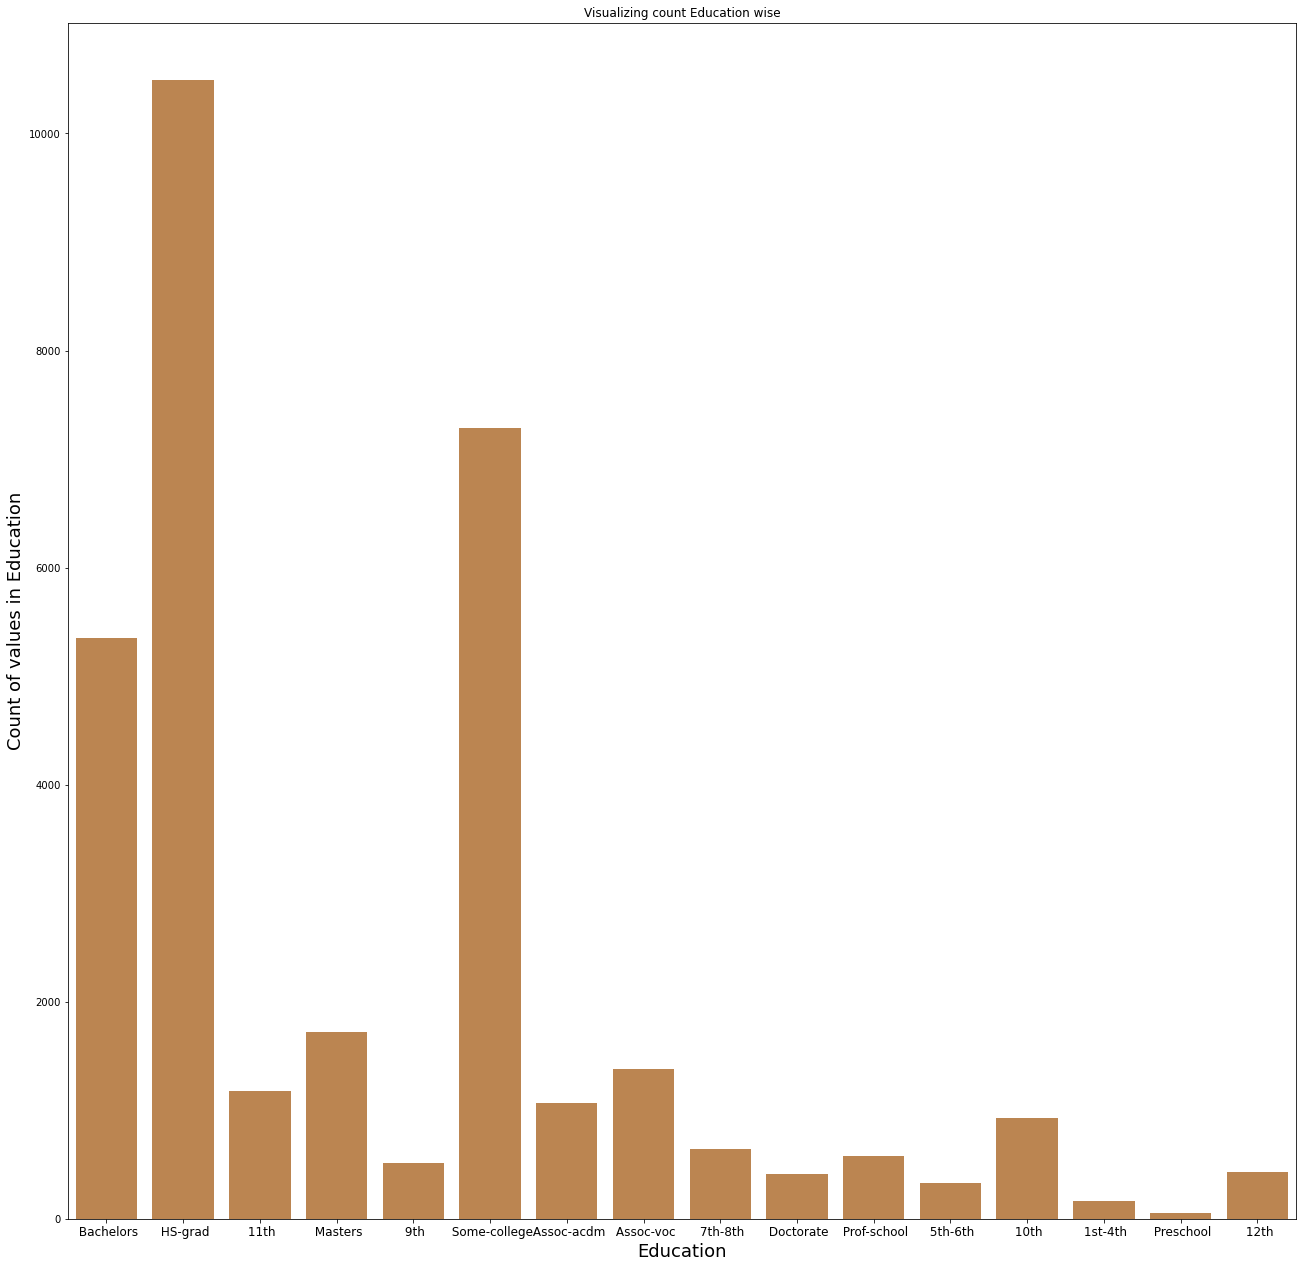

In [17]:
plt.figure(figsize=(22,22))
sns.countplot(x='Education',data=df,color='peru')
plt.xlabel('Education',fontsize=18)
plt.xticks(fontsize=12)
plt.ylabel('Count of values in Education',fontsize=18)
plt.title("Visualizing count Education wise")
plt.show()

                                        **Observations**

**Higher_Secondory education is having the most count of numbers and some-college has been visualized as the second highest in number of counts**

**Apart from this Bachelors are also showing good amount of count in Education sector most of the count are gathered by Higher_Secondary,Some_college and Bachelors**

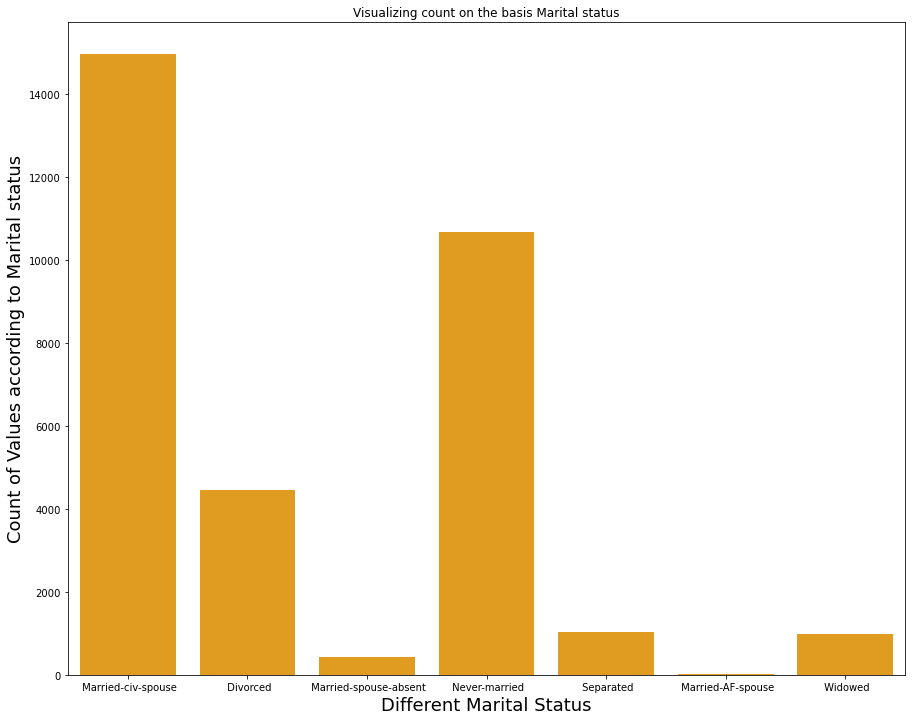

In [18]:
plt.figure(figsize=(15,12))
sns.countplot(x='Marital_status',data=df,color='orange')
plt.xlabel('Different Marital Status',fontsize=18)
plt.ylabel("Count of Values according to Marital status",fontsize=18)
plt.title("Visualizing count on the basis Marital status")
plt.show()

                                               **Observations**

**Married--civ-spouse are having the maximum counts where Never-married count are also having good numbers**

**Divorced people as compared to other categories mentioned above are having more counts and least number of counts has been observed in Married_AF-spouse**

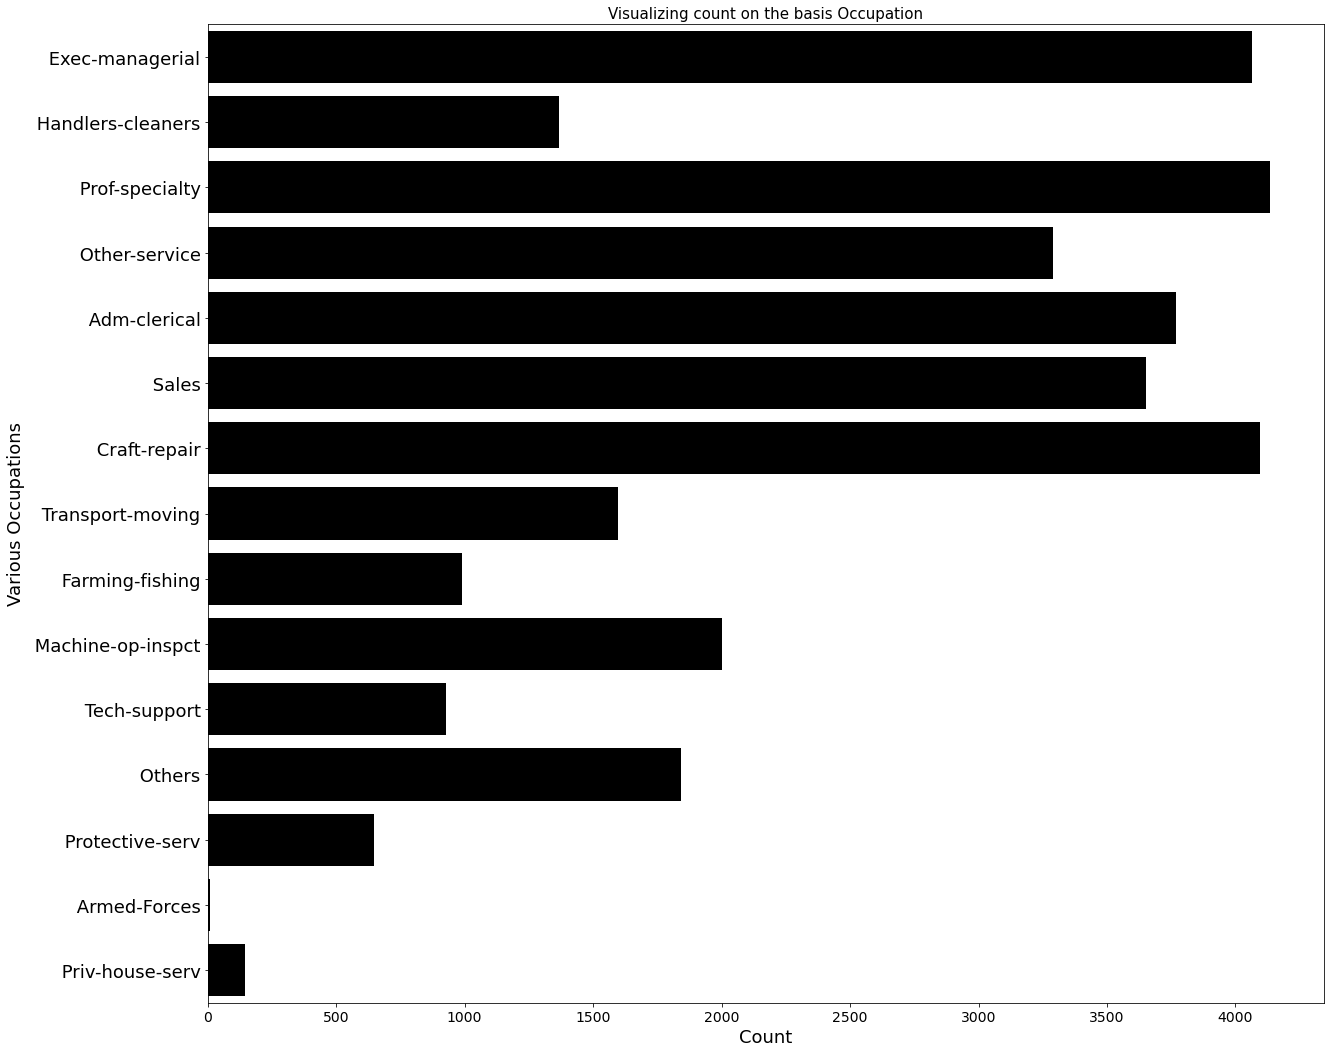

In [19]:
plt.figure(figsize=(20,18))
sns.countplot(y='Occupation',data=df,color='black')
plt.xlabel('Count',fontsize=18)
plt.ylabel("Various Occupations",fontsize=18)
plt.title("Visualizing count on the basis Occupation",fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.show()

                                              **Observations**
                                              
**Almost equivalent amount of count has been visualized in Craft-repair,Prof-speciality ,Exec-managerial**

**Handlers and Transport-moving has been visualized as the same number of counts**

**Adm-clerical,Sales and Other service are almost equal in count and least count has been observed between Armed-Forces**

**Farming_fishing and Tech_support are almost equal in count**
                                              

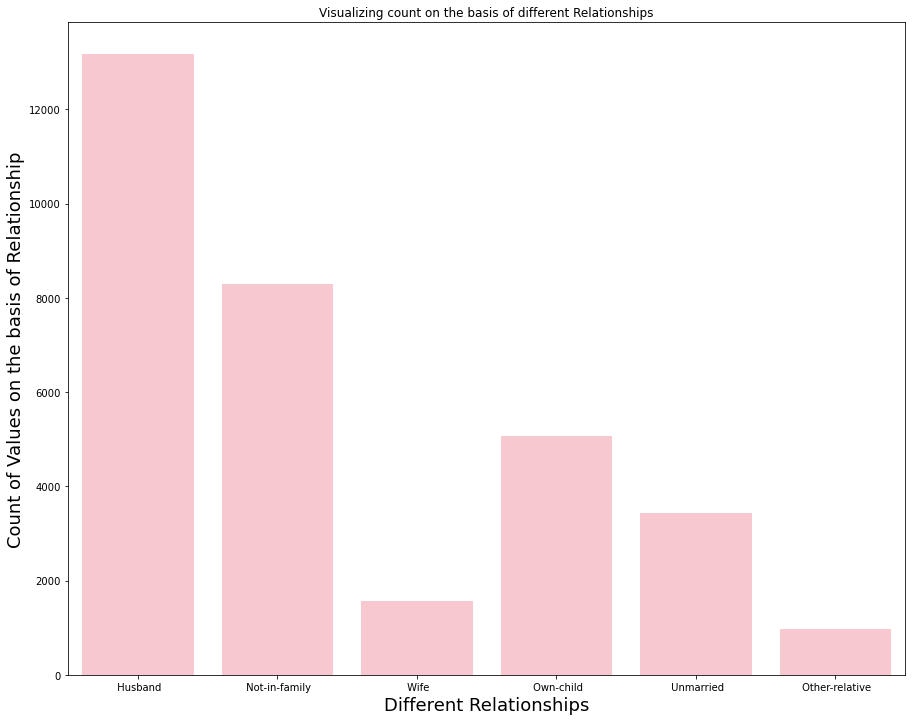

In [20]:
plt.figure(figsize=(15,12))
sns.countplot(x='Relationship',data=df,color='pink')
plt.xlabel('Different Relationships',fontsize=18)
plt.ylabel("Count of Values on the basis of Relationship",fontsize=18)
plt.title("Visualizing count on the basis of different Relationships")
plt.show()

                                   **Observations***

**Husbands(Males) are having more count as compared with all other categories & their are people who do not have Family holding the second number of count,Others has been visualized with the least count**

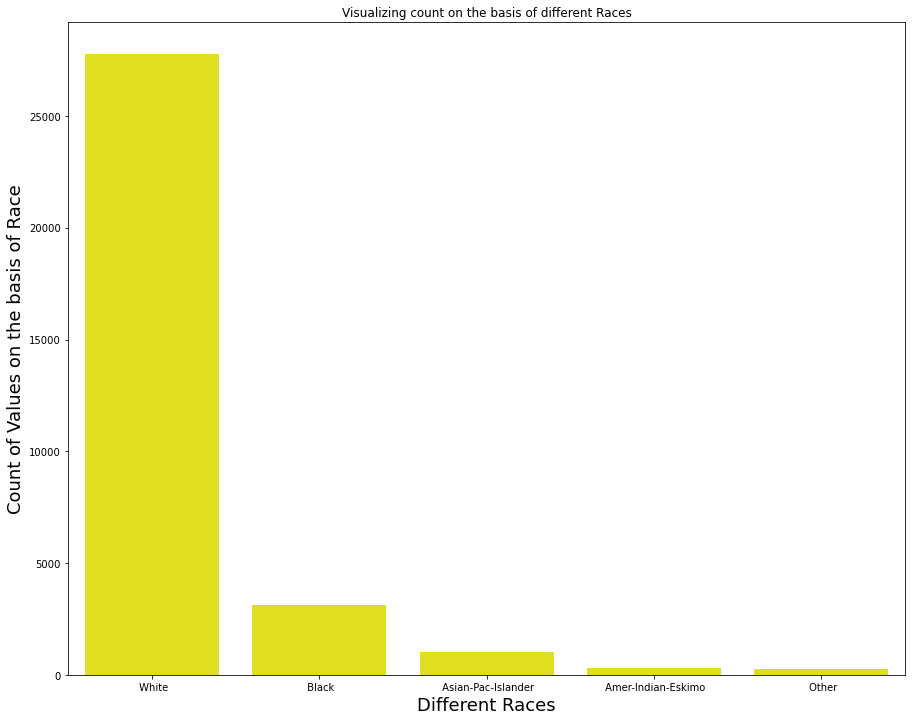

In [21]:
plt.figure(figsize=(15,12))
sns.countplot(x='Race',data=df,color='yellow')
plt.xlabel('Different Races',fontsize=18)
plt.ylabel("Count of Values on the basis of Race",fontsize=18)
plt.title("Visualizing count on the basis of different Races")
plt.show()

                                    **Observations**
                                    
**Most of the data are covering white race people where it has been observed and visualized that other races might not share as much as count when we compare the same from White people**

**This data is mostly based on United-States & it is aso infering that stats of Races of white people are maximum for taking census income in consideration**

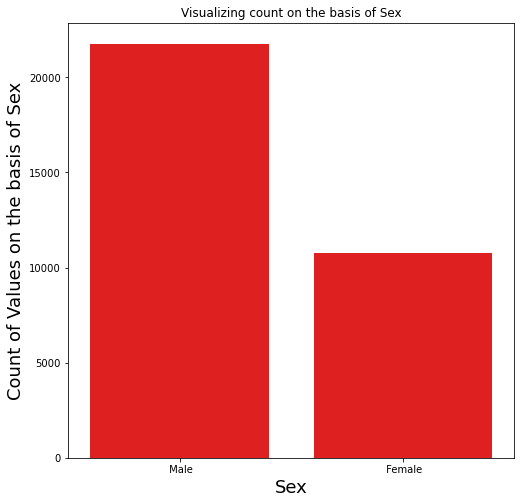

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(x='Sex',data=df,color='red')
plt.xlabel('Sex',fontsize=18)
plt.ylabel("Count of Values on the basis of Sex",fontsize=18)
plt.title("Visualizing count on the basis of Sex")
plt.show()

                                       **Observations**
                                       
**Count of Males are more as compared to Females**                                       

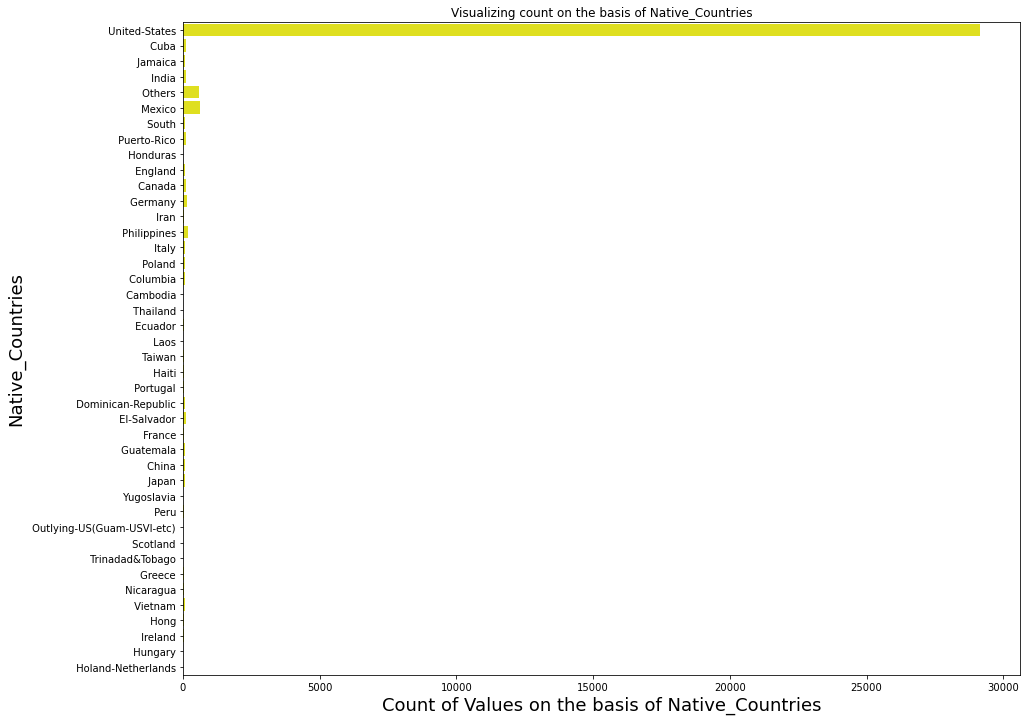

In [23]:
plt.figure(figsize=(15,12))
sns.countplot(y='Native_country',data=df,color='yellow')
plt.xlabel('Count of Values on the basis of Native_Countries',fontsize=18)
plt.ylabel("Native_Countries",fontsize=18)
plt.title("Visualizing count on the basis of Native_Countries")
plt.show()

                                         **Observations**

**United_states itself is covering almost all the data points,Data specifically is targeting United_states and their insights a very miniscule data has been visualized in Others,Mexico,Cuba,Jamaica,India,Phillipines**

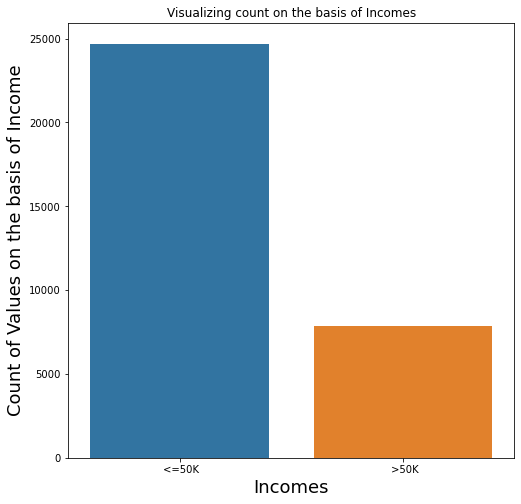

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(x='Income',data=df)
plt.xlabel('Incomes',fontsize=18)
plt.ylabel("Count of Values on the basis of Income",fontsize=18)
plt.title("Visualizing count on the basis of Incomes")
plt.show()

                                    **Observations**
                                    
**Class imbalance has been observed in our Target variable,we will correct the same before Model building to ensure machine will learn the equivalent data and give the best accurate possible result**                                    

In [25]:
object_datatype

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [26]:
integer_datatype

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

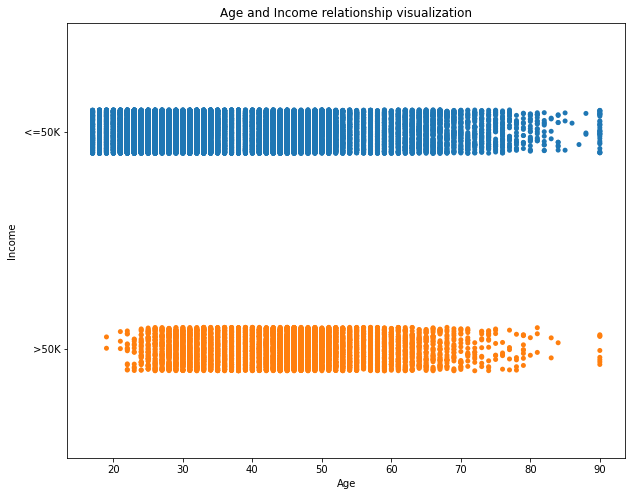

In [27]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Age',y='Income',data=df)
plt.title('Age and Income relationship visualization')
plt.show()

                                **Observations**

**In income >50k their are very less count of points has been visualized in earlier range of Age where equivalent amount amount of data points has been observed where income<=50k till 78 in this segment and we can visualize scattering of data points in Income >50K in when it comes in range in age of 70 years**

                              **Conclusion of observation**
                              
**Their are very less count of people earning more than 50K(dollars) in their early Age range where less than equal to 50K(dollars) people are showing a equal trend and more count as compared to second category of Income**                             

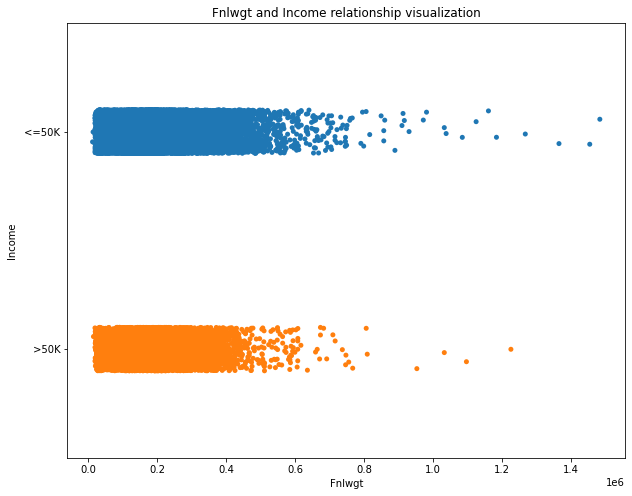

In [27]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Fnlwgt',y='Income',data=df)
plt.title('Fnlwgt and Income relationship visualization')
plt.show()

                                **Observations**
                                
**Income categorised as <= 50K are showing the equivalent count of weights upto range of 0.55 and if we compare Income>50K data is equal till range of 0.4,we can clearly visualize the scattering of datapoints after this range**                                  

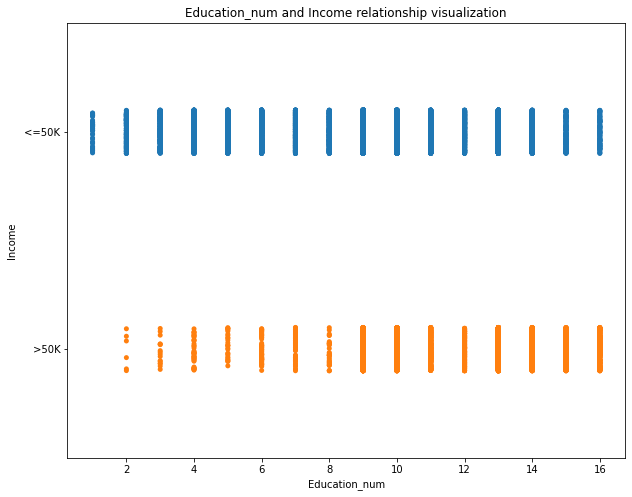

In [29]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Education_num',y='Income',data=df)
plt.title('Education_num and Income relationship visualization')
plt.show()

                                    **Observations**
                                    
**Income<=50K is almost having equivalent amount of count in Education numbers & if we compare the same where Income>50K in the begining the count of Data points are not present where in Range of 2 they are also very less in numbers nd this trend has been visualized upto range of 4 and after that some balance in Data points has been visualized and they are again scattering in range of 8**

**Post this almost equivalent trend has been visualized**

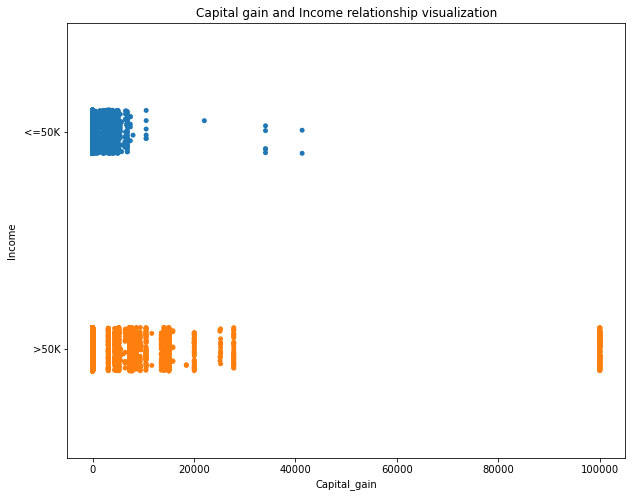

In [30]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Capital_gain',y='Income',data=df)
plt.title('Capital gain and Income relationship visualization')
plt.show()

                            **Observations**
                            
**Income<=50K has a equivalent trend of capital upto 10,000 & after this range no capital gain has been visualized,where in Income>50K balanced captial gains has been visualized utp 35,000 and after that a good amount of capital gain is also visualized in same category,maybe a outliers & it has been noted** 

**Having Income>50K has been observed as more Capital gain providing income as compared to second segement of Income i.e.<=50K**

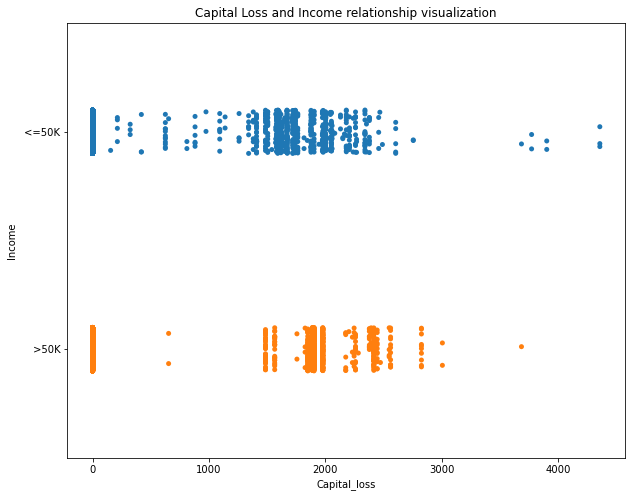

In [31]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Capital_loss',y='Income',data=df)
plt.title('Capital Loss and Income relationship visualization')
plt.show()

                                 **Observations**
                                 
**In the starting where Income<=50K a scattered and balanced trend has been observed upto 2200,and in comparison almost negligible capital loss in range of 100-1400 has been visualized in second category of Income**

**Having Income>50K are incurring very less Capital Loss as compared with Income<=50K**

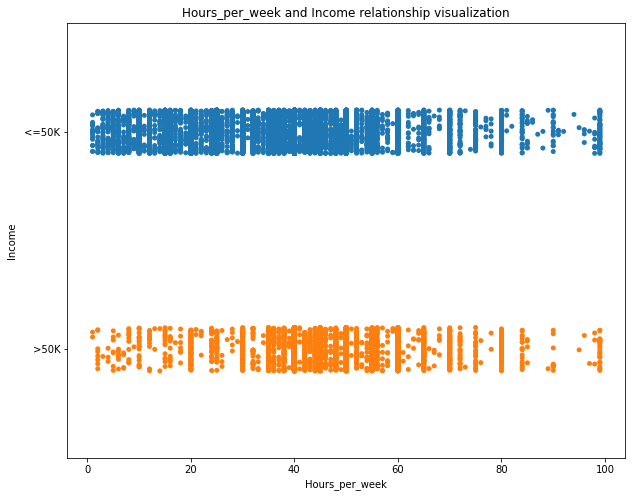

In [32]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Hours_per_week',y='Income',data=df)
plt.title('Hours_per_week and Income relationship visualization')
plt.show()

                              **Observations**
 
 **Even after contributing maximum in Hours_per_week of work Income<=50K is holding the maximum datapoints uto range of 60 hours post this range points are scattering and very less count has been observed**
 
 **Range of 35-58 hours is having the maximum numbers of count of people having Income>50K**
 

                              

<Figure size 864x864 with 0 Axes>

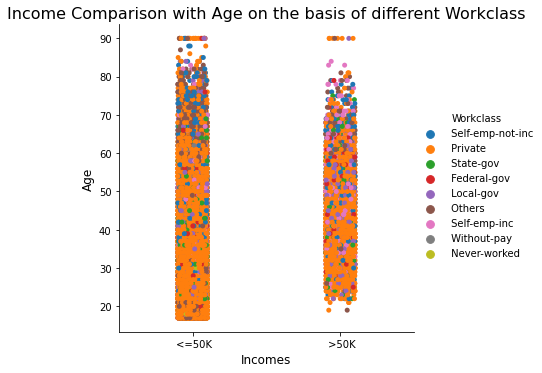

In [33]:
plt.figure(figsize=(12,12))
sns.catplot(x='Income',y='Age',hue='Workclass',data=df)
plt.xlabel("Incomes",fontsize=12)
plt.ylabel("Age",fontsize=12)
plt.title('Income Comparison with Age on the basis of different Workclass',fontsize=16)
plt.show()

                                        **Observations**
                                        
**Private employees are having the maximum counts in both the income groups and we can also visualize in  range of Age Private employees are covering with maximum data points**

**Self_employed workclass is also showing data points in almost all the range of age**

**In Income group <=50K after 62 years we can see a mix of Workclasses and almost same trend has been observed in Income >50K(in Dollars)**

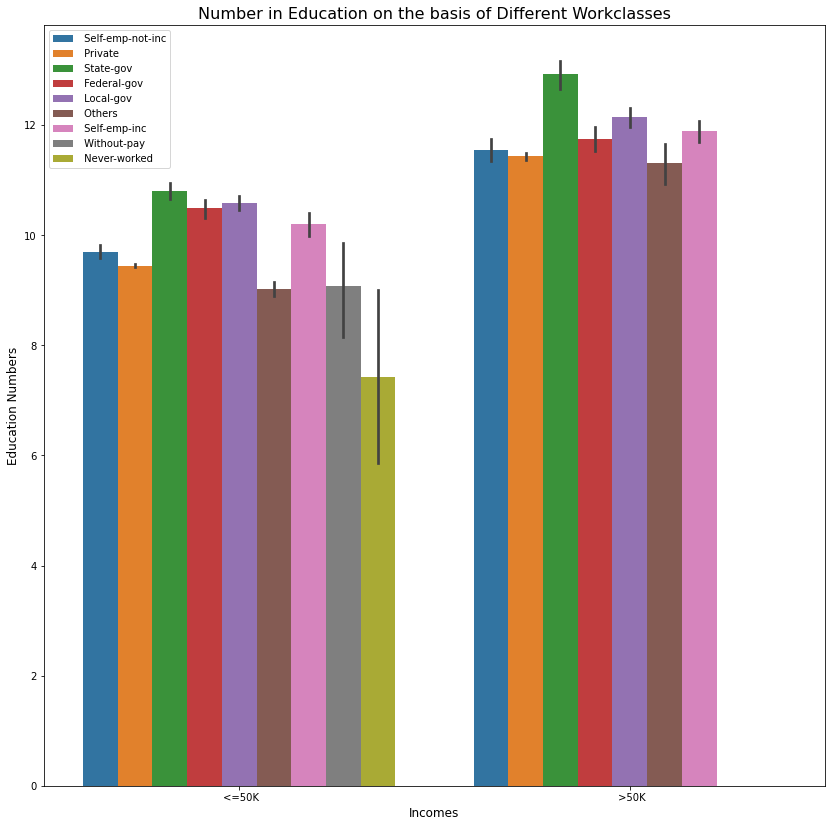

In [36]:
plt.figure(figsize=(14,14))
sns.barplot(x='Income',y='Education_num',hue='Workclass',data=df)
plt.xlabel("Incomes",fontsize=12)
plt.ylabel("Education Numbers",fontsize=12)
plt.title('Number in Education on the basis of Different Workclasses',fontsize=16)
plt.legend()
plt.show()

                                  **Observations**
                                  
**We can visualize in almost every sector equivalent amount of count of Education numbers has been observed where Income <=50K only apart from segment where Never_worked category is holding the least count which is logical**

                                         **Income>50K**

**State_Goverment segment is holding the maximum count of Education numbers and local goverment is just beneath the State_Goverment**

**We can visulize that Education numbers are more in count where Income>50K ,hence the number of Education plays a direct part in having Income>50K**

<Figure size 864x864 with 0 Axes>

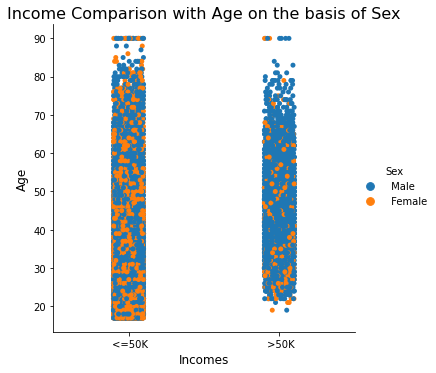

In [74]:
plt.figure(figsize=(12,12))
sns.catplot(x='Income',y='Age',hue='Sex',data=df)
plt.xlabel("Incomes",fontsize=12)
plt.ylabel("Age",fontsize=12)
plt.title('Income Comparison with Age on the basis of Sex',fontsize=16)
plt.show()

                               **Observations**

**Income<=50K is holding a mix of Males and Females in almost every Age range** 

**Income>50K is showing clear dominance of Males in almost every Age range**



<Figure size 1440x1440 with 0 Axes>

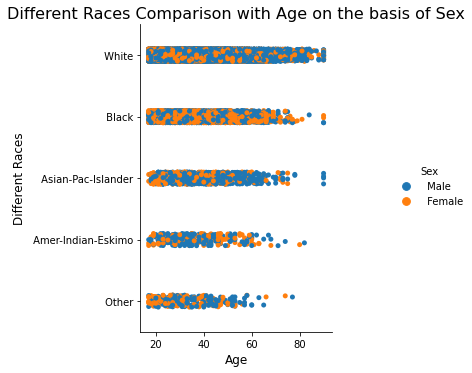

In [16]:
plt.figure(figsize=(20,20))
sns.catplot(x='Age',y='Race',hue='Sex',data=df)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Different Races",fontsize=12)
plt.title('Different Races Comparison with Age on the basis of Sex',fontsize=16)
plt.show()

                                  **Observations**

**In Others equal count of males and Females has been visualized and maximum data points are in Range of 58 in Age,In the younge Age in Amer_Indian_Eskimo Females are more in count in mid-age both males and females has been visualized in equal count as when Age increases count of Females are are increasing in comparison with males**

**In Asian-Pac-Islander younger Age has been dominant by Females where in Older age males are dominating**

**Equal count of points has been observed in Blacks for Males and Females**

**Males are more than slightly higher in whites as compared to Females**

<Figure size 1440x1440 with 0 Axes>

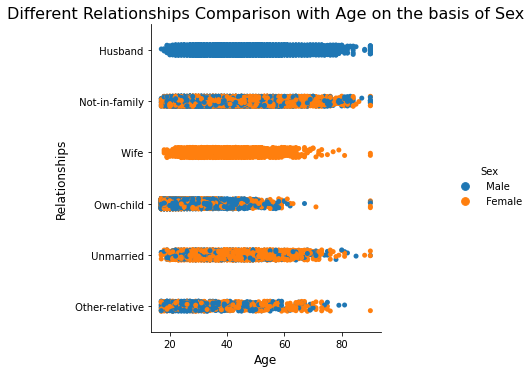

In [17]:
plt.figure(figsize=(20,20))
sns.catplot(x='Age',y='Relationship',hue='Sex',data=df)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Relationships",fontsize=12)
plt.title('Different Relationships Comparison with Age on the basis of Sex',fontsize=16)
plt.show()

                                 **Observations**
**Females are dominant in Not-in-Family subset of Relationship where Males has been Visualized with dominance with people having Own child,Unmarried Females are more in ratio as compared to Males**

**In Others upto age 38 equal mixture of Males and females has been observed post mid-age Females are dominating the subset**

<Figure size 1440x1440 with 0 Axes>

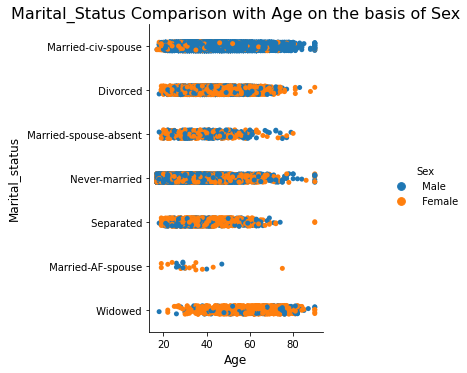

In [18]:
plt.figure(figsize=(20,20))
sns.catplot(x='Age',y='Marital_status',hue='Sex',data=df)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Marital_status",fontsize=12)
plt.title('Marital_Status Comparison with Age on the basis of Sex',fontsize=16)
plt.show()

                                 **Observations**
                                 
**In almost all the Age range in divorced segment Females are having the maximum count,from the starting to end range of age Females has has been visualized as dominant**

**Almost equal count of data points has been visualized for segement Married_spouse_absent for Males and females**

**Married-civ-spouse has been dominant with count of Males post younger age where Females are Dominant**

<Figure size 1440x1440 with 0 Axes>

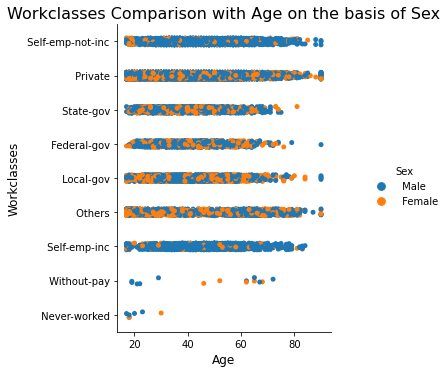

In [19]:
plt.figure(figsize=(20,20))
sns.catplot(x='Age',y='Workclass',hue='Sex',data=df)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Workclasses",fontsize=12)
plt.title('Workclasses Comparison with Age on the basis of Sex',fontsize=16)
plt.show()

                                   **Observations**
**We can visualize in almost all the sectors(except two Self-emp-not-inc and Self-emp-inc) Males and Females are showing a equivalent Data points ,Males have been visualized as dominant in Self-emp-not-inc and Self-emp-inc**

**Very less count of Data points has been visualized in Without-pay and Never-Worked**

<Figure size 1440x1440 with 0 Axes>

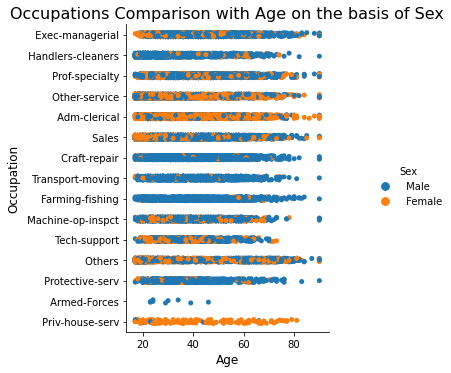

In [20]:
plt.figure(figsize=(20,20))
sns.catplot(x='Age',y='Occupation',hue='Sex',data=df)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Occupation",fontsize=12)
plt.title('Occupations Comparison with Age on the basis of Sex',fontsize=16)
plt.show()

                                      **Observations**

**Private-house-service indicates that more Females are indulge in this Service where in Armed Forces clear dominance of Males has been visualized**

**In Protective services,Farming-Fishing,Transport-moving,Craft-repair Males are dominating the count**

**We can visualize more Exec-managerial for Females in young age as compared with Males**

**In clerical a clear dominance of females has been visualized**

**Handlers-cleaners occupation is clearly dominated by Males**

<Figure size 1440x1440 with 0 Axes>

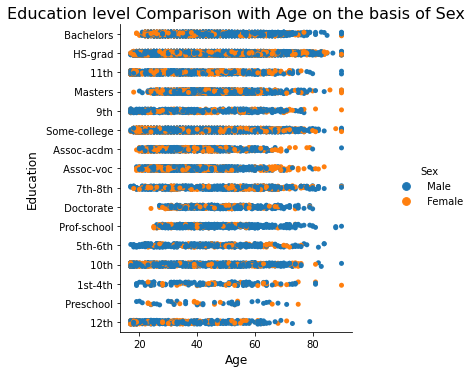

In [21]:
plt.figure(figsize=(20,20))
sns.catplot(x='Age',y='Education',hue='Sex',data=df)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Education",fontsize=12)
plt.title('Education level Comparison with Age on the basis of Sex',fontsize=16)
plt.show()

                                    **Observations**
                                    
**On the basis of Education level initial school level classes uto 12th has been covered up by Males with maximum Data points,where in Bachelors we can observe a trend of young Females dominance and remaining all Education Levels are equally contributed by count of Males and Females**                                    

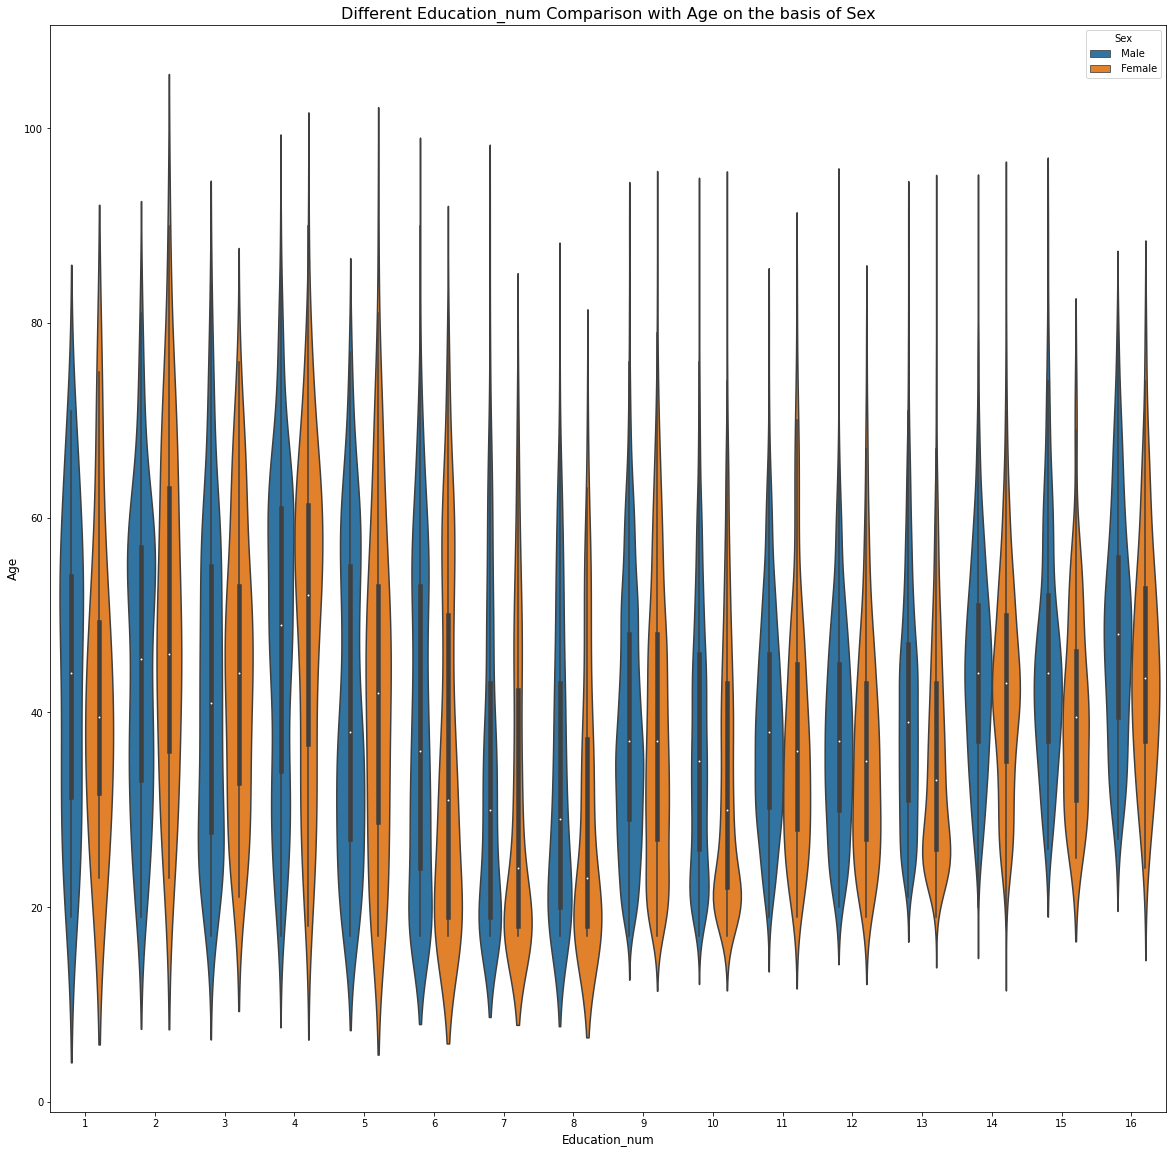

In [25]:
plt.figure(figsize=(20,20))
sns.violinplot(x='Education_num',y='Age',hue='Sex',data=df)
plt.xlabel("Education_num",fontsize=12)
plt.ylabel("Age",fontsize=12)
plt.title('Different Education_num Comparison with Age on the basis of Sex',fontsize=16)
plt.show()

                                **Observations**

**Almost same trend has been visualized from starting to ending range of Age for both Males and females**

                                

**Checking the distribtion of Data for columns**

In [ ]:
plt.style.use('default')
g = sns.pairplot(df, hue='Income', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

**Data Distribution has been visualized**

**Encoding**

In [26]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Income"] = le.fit_transform(df["Income"])


In [27]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df['Workclass'] = oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status'] = oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation'] = oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship'] = oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Native_country'] = oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Race'] = oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex'] = oe.fit_transform(df['Sex'].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,4.0,0
4,37,4.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,39.0,0


**Visualizing the dataset Post Encoding**

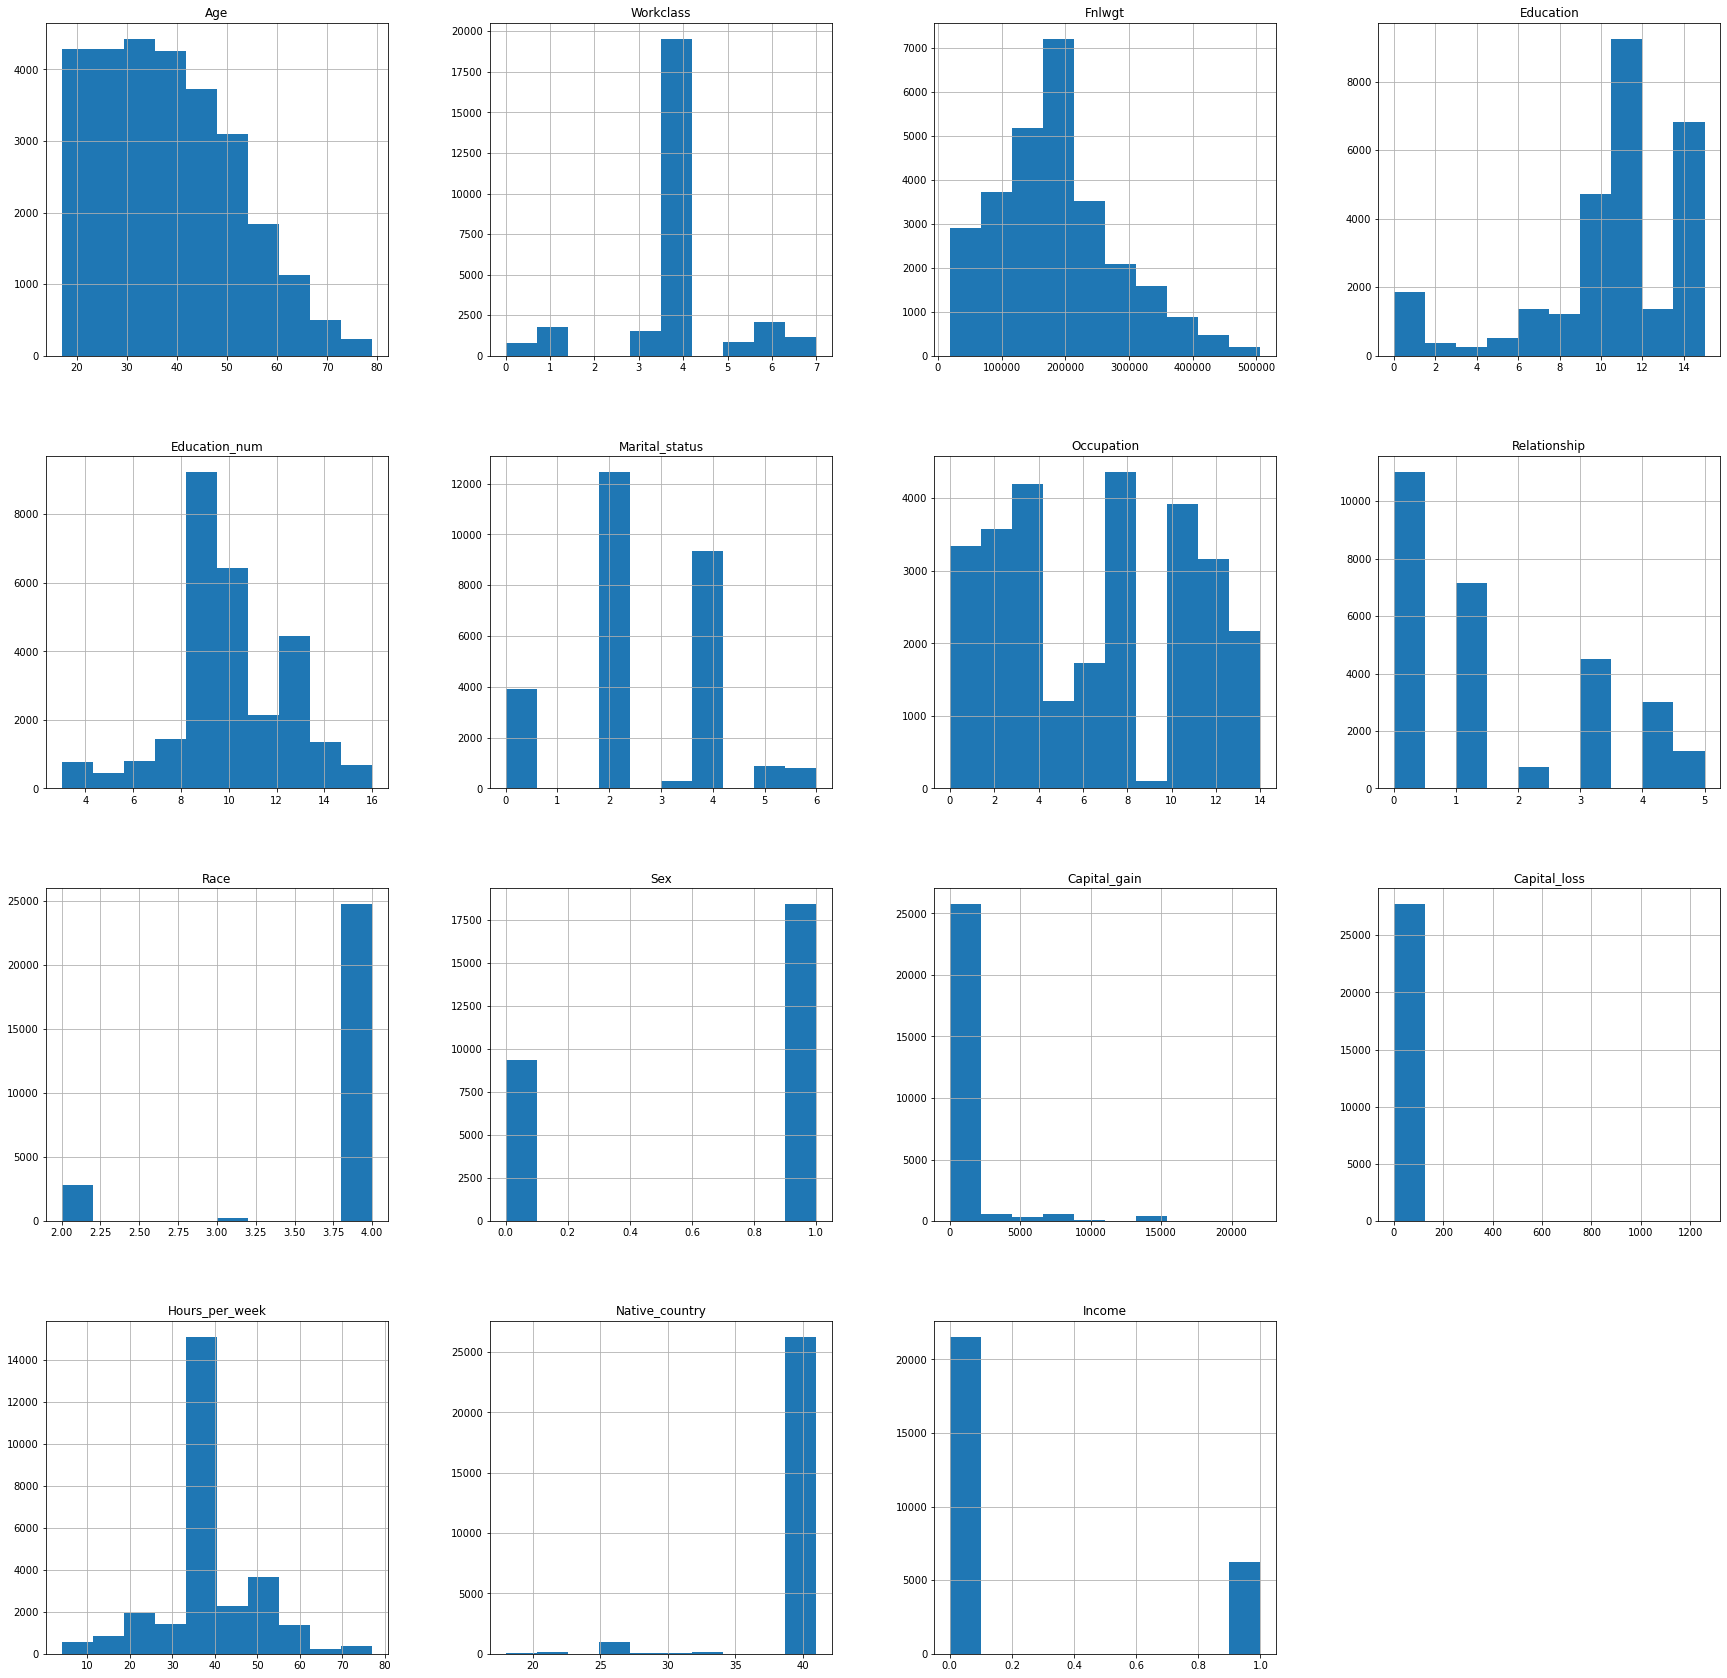

In [34]:
df.hist(figsize=(30,30))
plt.show()

**Dataset has been visualized as satisfactory post Encoding**

**Correlation**

<AxesSubplot:>

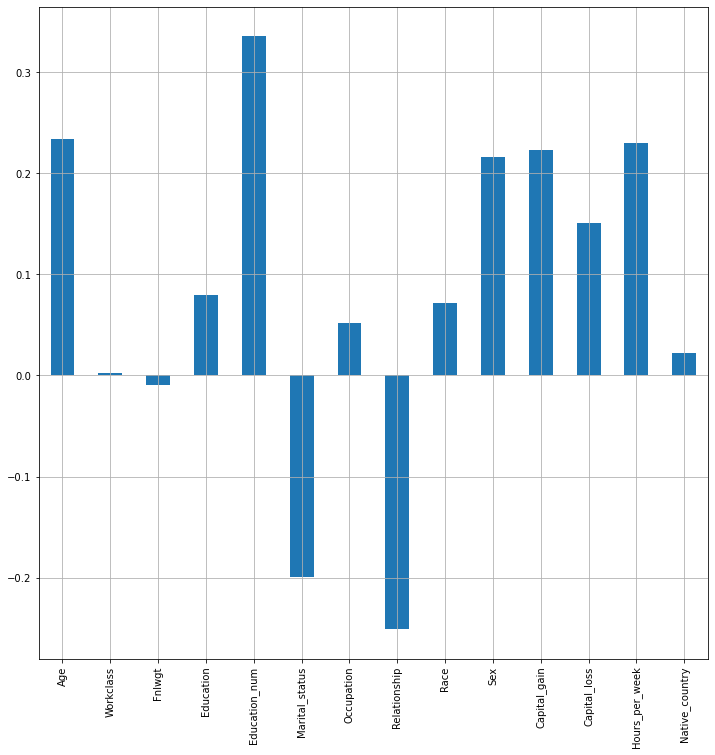

In [29]:
df.drop('Income',axis=1).corrwith(df.Income).plot(kind='bar',grid=True,figsize=(12,12))

                             **Observations on Correlation**

**Highest Correlated--->Education_num**

**PositivelyCorrelated-->Age,Workclass,Education,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country**

**Negatively correlated----> Relationship,Marital_status,Fnlwgt**

**Outliers**

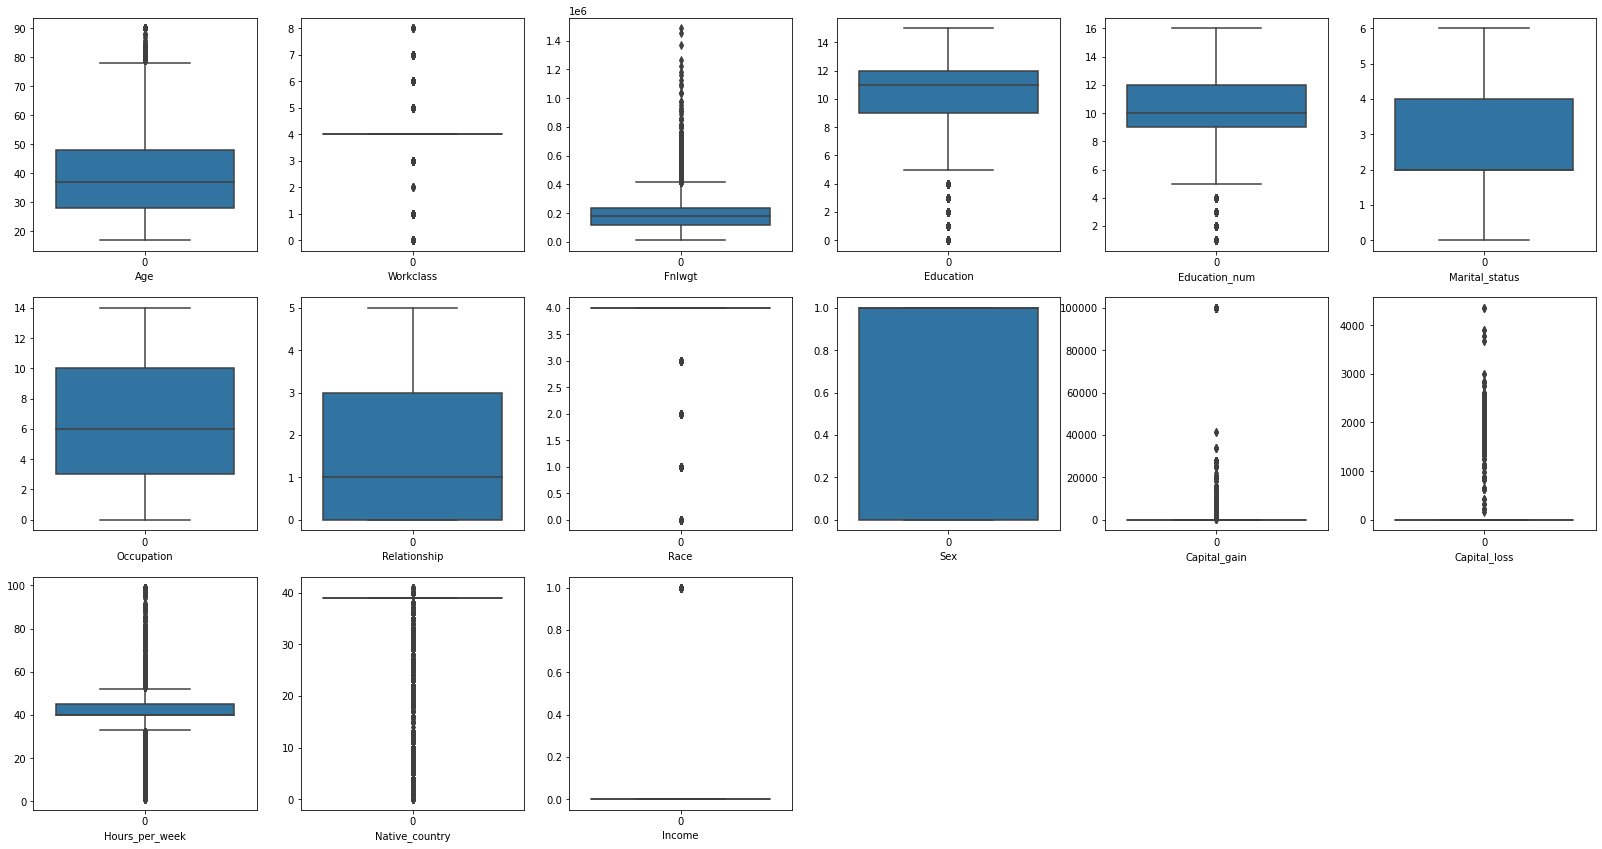

In [53]:
plt.figure(figsize=(28,30))
plotnumber=1
for column in df:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**Removing Outliers using Z Score**

In [30]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (27763, 15)
Percentage of data loss post outlier removal:  14.669904106220802


**Percentage Loss is acceptable since Dataset is very Large**

**Visualizing Outliers after removing Outliers**

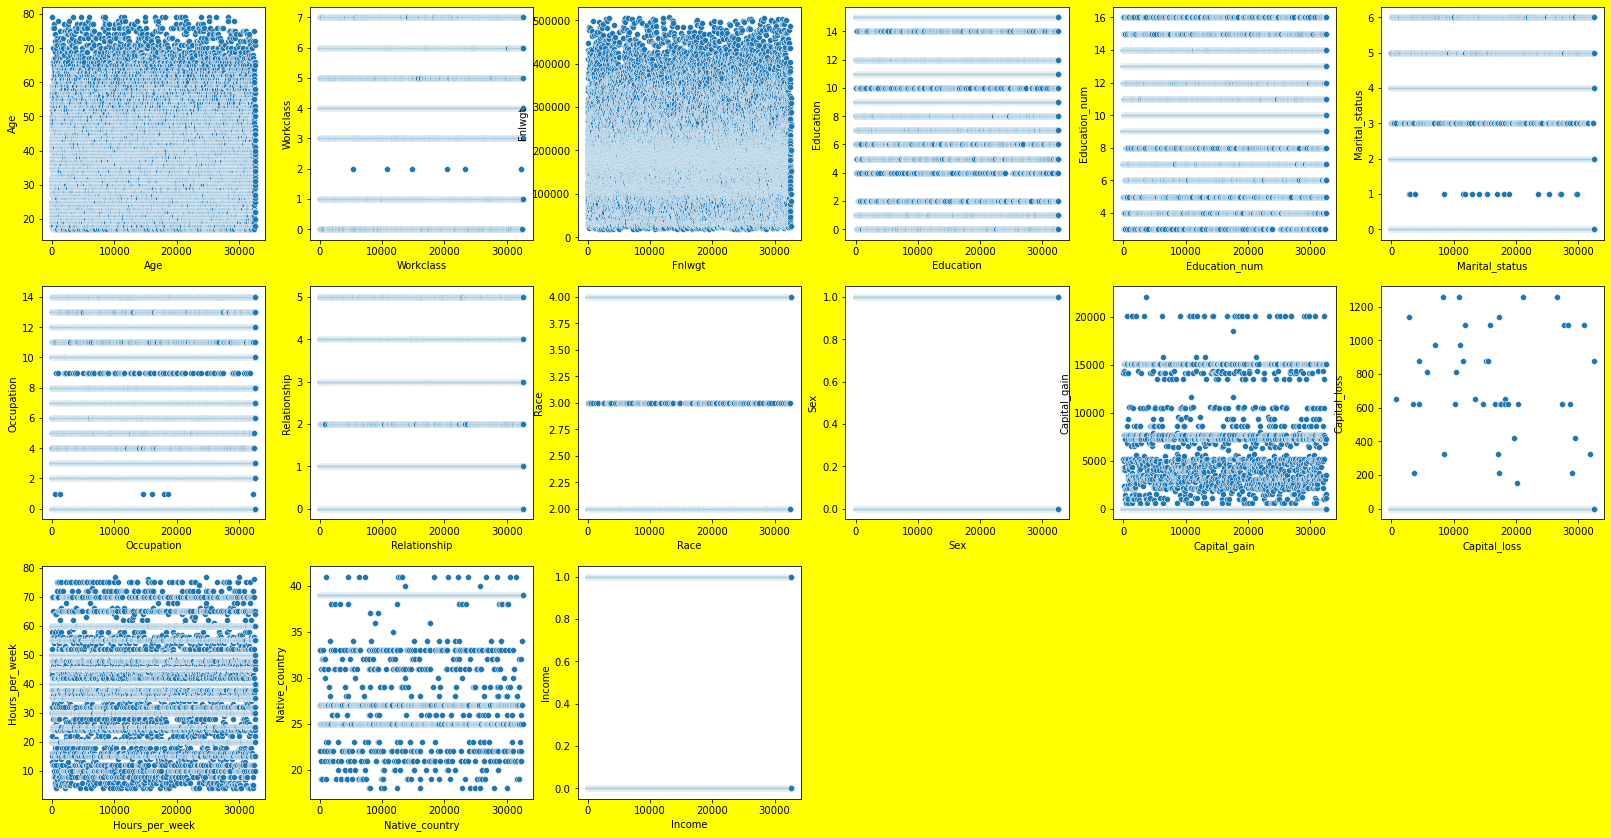

In [32]:
plt.figure(figsize=(28,30),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.scatterplot(data=df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**Outliers are in Complete Controll**

**Skewness Visualization**

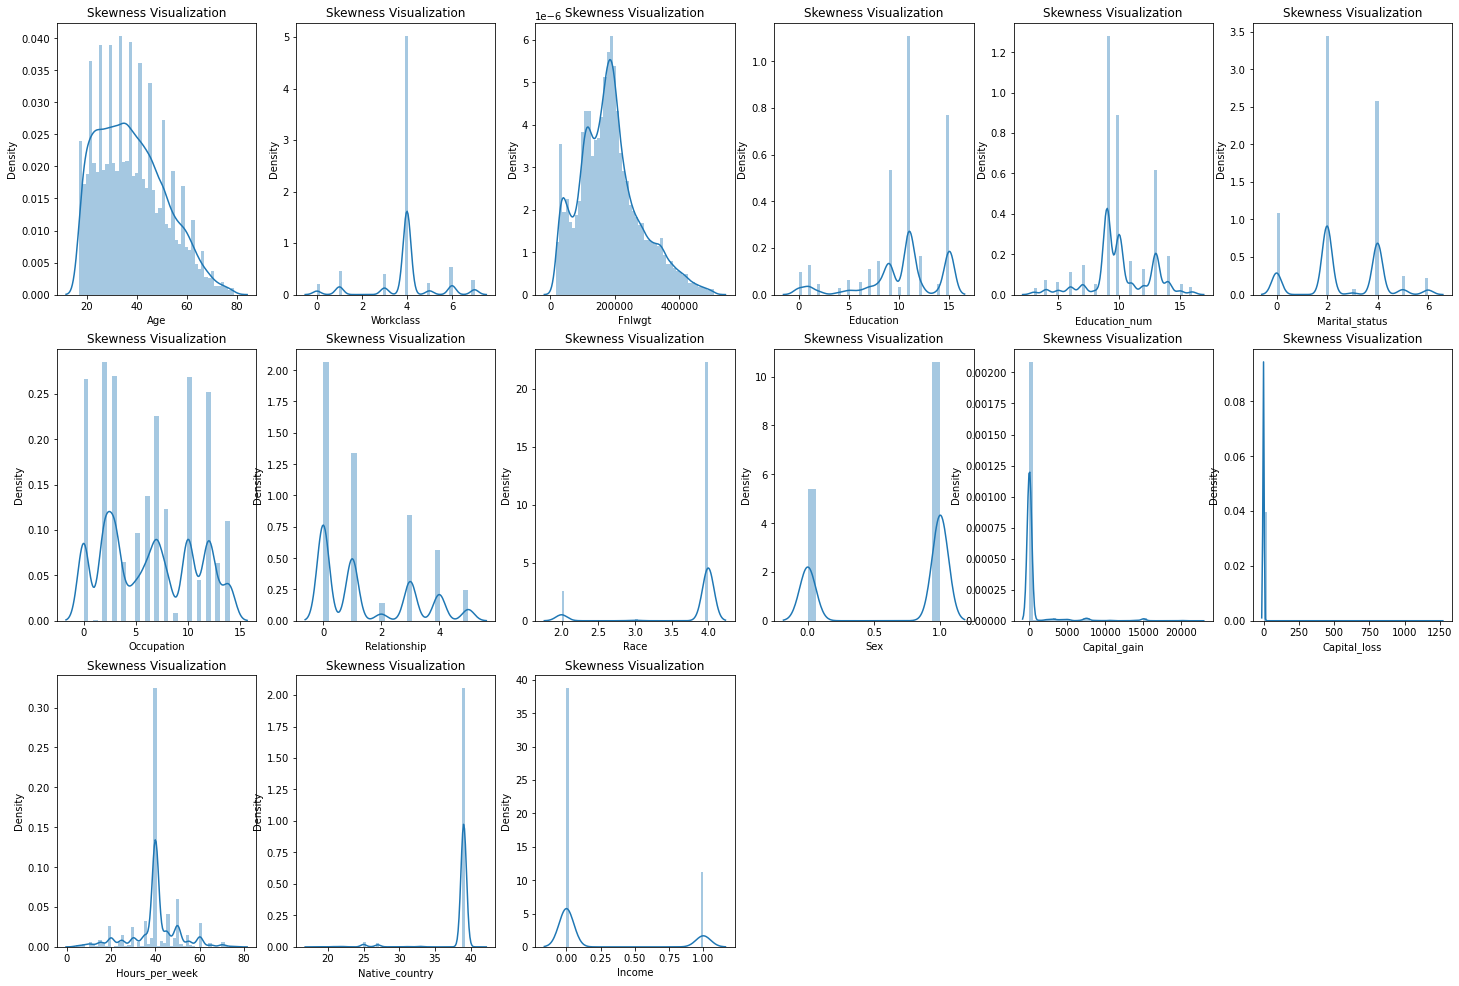

In [33]:
plt.figure(figsize=(25,35))
plotnumber=1
for column in df:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.distplot(df[column])
        plt.title('Skewness Visualization')
    plotnumber+=1
    
plt.show() 

                                           **Observations**

**We have found data is skewed for almost all he columns we will be using Power Transformer to remove the skewness of data**

In [35]:
x= df.drop(columns=['Income'])
y = df['Income']

**Using Power Transformer to Remove Skewness**

In [36]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.925084,1.702392,-1.126689,-0.489662,1.229159,-0.384972,-0.682002,-1.107437,0.348321,0.713056,-0.297184,-0.040293,-2.216851,0.210342
1,0.128363,-0.021131,0.413119,0.077810,-0.463273,-1.761108,-0.178693,0.106691,0.348321,0.713056,-0.297184,-0.040293,-0.040177,0.210342
2,1.099964,-0.021131,0.593438,-2.073369,-1.261213,-0.384972,-0.178693,-1.107437,-2.874250,0.713056,-0.297184,-0.040293,-0.040177,0.210342
3,0.053278,-0.021131,1.035814,0.382731,1.669381,-0.384972,-0.682002,1.549696,0.348321,-1.402414,-0.297184,-0.040293,-0.040177,0.210342
4,0.864923,-0.021131,-0.156969,-1.225513,-2.018790,0.269587,0.261285,0.106691,-2.874250,-1.402414,-0.297184,-0.040293,-2.012913,-3.887418


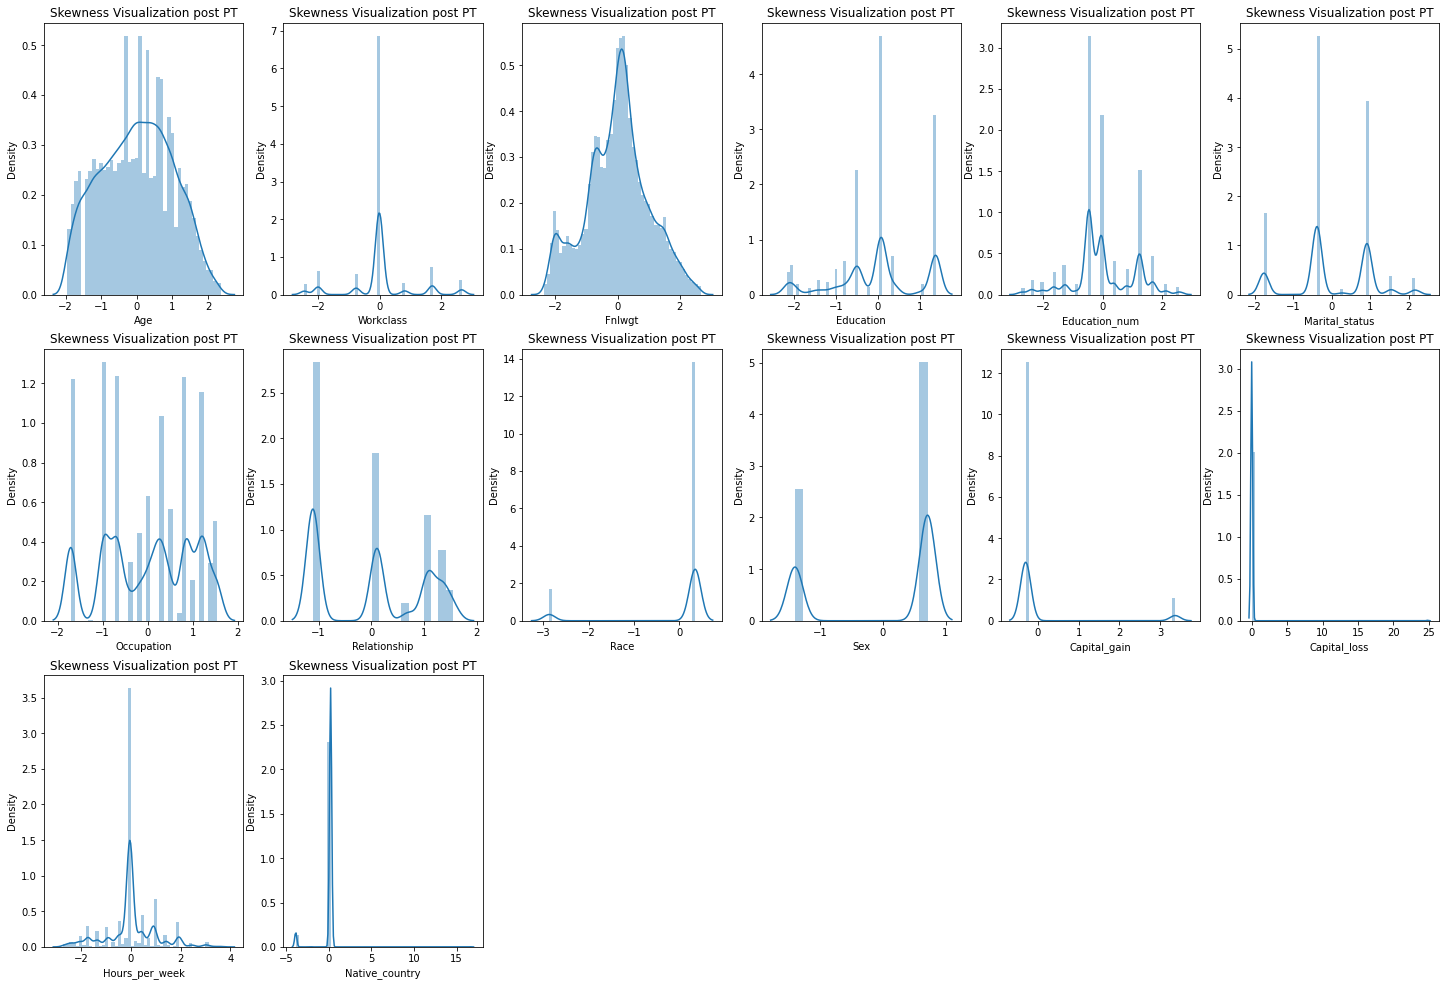

In [37]:
plt.figure(figsize=(25,35))
plotnumber=1
for column in x:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        ax=sns.distplot(x[column])
        plt.title('Skewness Visualization post PT')
    plotnumber+=1
    
plt.show() 

**Skewness is in complete controll**

**Multi-Collinearity check**

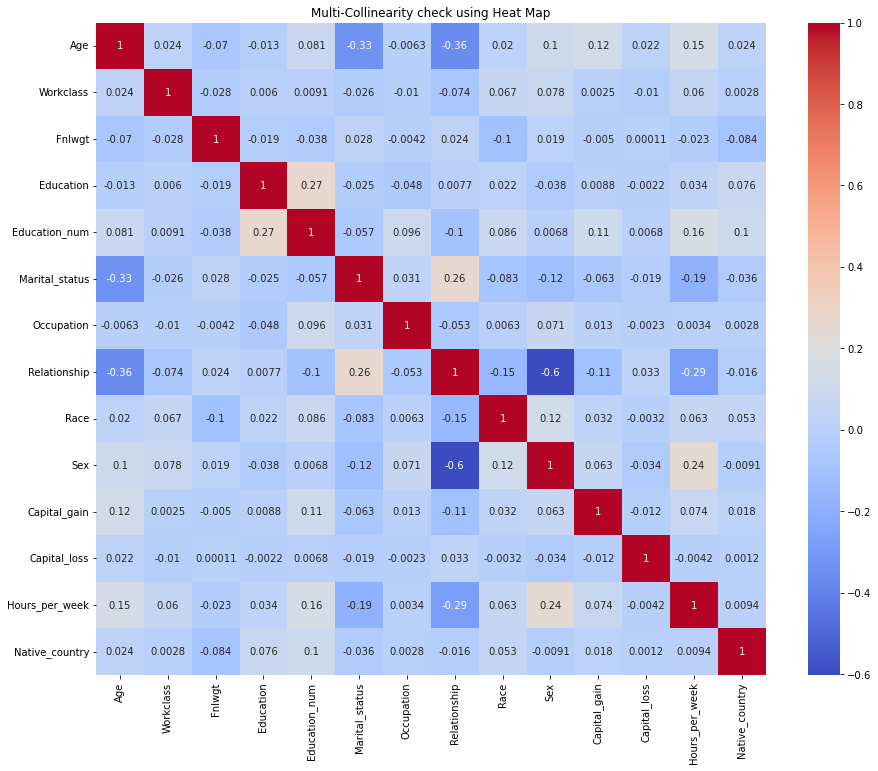

In [42]:
coreleation= x.corr()
plt.figure(figsize=(15,12))
plt.title("Multi-Collinearity check using Heat Map")
sns.heatmap(coreleation,cbar=True,annot=True,cmap= 'coolwarm')
plt.show()

**No sign of Multi-Collinearity has been visualized**

**VIF**

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Age,1.280672
1,Workclass,1.012601
2,Fnlwgt,1.024133
3,Education,1.089320
4,Education_num,1.152458
5,Marital_status,1.176723
6,Occupation,1.023281
7,Relationship,1.922478
8,Race,1.050358
9,Sex,1.644344


**We have Visualized the Dataset taken care of Outliers and Skewness and no Multi-Collinearity has been Observed in Features**

# Class Imbalance using SMOTE

In [44]:
#Importing Library
from imblearn.over_sampling import SMOTE
over = SMOTE()
x, y = over.fit_resample(x, y)

y.value_counts()

0    21535
1    21535
Name: Income, dtype: int64

**Data Scaling using Standard Scaler**

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
##Scaling data using Standard Scaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.822415,1.659856,-1.163828,-0.560743,0.991441,-0.298242,-0.717175,-0.868973,0.311277,0.610091,-0.385778,-0.033052,-2.462650,0.188574
1,-0.048340,-0.018681,0.433408,0.048686,-0.657944,-1.872130,-0.209335,0.329731,0.311277,0.610091,-0.385778,-0.033052,-0.201440,0.188574
2,1.013544,-0.018681,0.620451,-2.261543,-1.435588,-0.298242,-0.209335,-0.868973,-3.217476,0.610091,-0.385778,-0.033052,-0.201440,0.188574
3,-0.130402,-0.018681,1.079326,0.376152,1.420465,-0.298242,-0.717175,1.754407,0.311277,-1.640556,-0.385778,-0.033052,-0.201440,0.188574
4,0.756663,-0.018681,-0.157942,-1.350999,-2.173896,0.450378,0.234604,0.329731,-3.217476,-1.640556,-0.385778,-0.033052,-2.250792,-4.088679


**Importing necessary Libraries for Model building**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

**Finding maximum accuracy**

In [51]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 78.8075780089153 on Random State 661


**Train_Test_Split**

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=661)


**Defining a function to print Accuracy_score,CV_Score,printing Classification_report and finally the result by deducting Accuracy score from CV score to choose the least difference model**

In [53]:
# Classification Model Function

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=431)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

**Logistic Regression**

In [54]:
# Logistic Regression

model=LogisticRegression()
classify(model, x, y)

Accuracy Score: 77.73031203566121

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      5426
           1       0.77      0.79      0.78      5342

    accuracy                           0.78     10768
   macro avg       0.78      0.78      0.78     10768
weighted avg       0.78      0.78      0.78     10768

Cross Validation Score: 77.717668911075

Accuracy Score - Cross Validation Score is 0.012643124586219301


**Decision Tree Classifier**

In [56]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)

Accuracy Score: 85.33618127786032

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      5426
           1       0.84      0.88      0.86      5342

    accuracy                           0.85     10768
   macro avg       0.85      0.85      0.85     10768
weighted avg       0.85      0.85      0.85     10768

Cross Validation Score: 85.34710935686093

Accuracy Score - Cross Validation Score is -0.010928079000606772


**Random Forest Classifier**

In [57]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)

Accuracy Score: 87.518573551263

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      5426
           1       0.84      0.93      0.88      5342

    accuracy                           0.88     10768
   macro avg       0.88      0.88      0.87     10768
weighted avg       0.88      0.88      0.87     10768

Cross Validation Score: 87.66658927327606

Accuracy Score - Cross Validation Score is -0.14801572201305646


**KNeighbours Classifier**

In [58]:
# KNeighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)

Accuracy Score: 83.53454680534918

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      5426
           1       0.79      0.91      0.85      5342

    accuracy                           0.84     10768
   macro avg       0.84      0.84      0.83     10768
weighted avg       0.84      0.84      0.83     10768

Cross Validation Score: 83.69398653355005

Accuracy Score - Cross Validation Score is -0.15943972820086572


**XGB Classifier**

In [59]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, x, y)

Accuracy Score: 90.46248142644873

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      5426
           1       0.90      0.91      0.90      5342

    accuracy                           0.90     10768
   macro avg       0.90      0.90      0.90     10768
weighted avg       0.90      0.90      0.90     10768

Cross Validation Score: 88.97376364058509

Accuracy Score - Cross Validation Score is 1.488717785863642


**Hyperparameter Tuning on Final Model Random Forest Classifier**

In [60]:
fmod_param = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2, 3, 4, 5],
              'min_samples_split':[3,5,7,9],
              'min_samples_leaf' : [2,3,4,5]}

In [61]:
GSCV = GridSearchCV(RandomForestClassifier(), fmod_param, cv=5)

In [62]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [3, 5, 7, 9]})

In [63]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 9}

In [64]:
Final_Model = RandomForestClassifier(criterion="gini", max_depth=5, min_samples_leaf=3,min_samples_split=9)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 83.6924219910847


**Confusion Matrix**

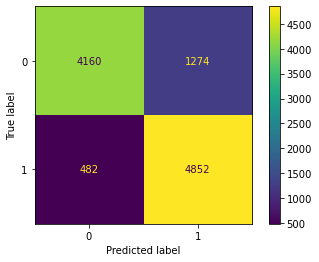

In [65]:
metrics_n = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test)

plt.show()

**Saving Final model**

In [66]:
import joblib
filename = "Final_RF.pkl"
joblib.dump(Final_Model, filename)

['Final_RF.pkl']

**Model Completed**